In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [39]:
path = './grades.html'
with open(path, 'r') as file:
    table = pd.read_html(file)
grades = table[4]
grades.columns = grades.columns.droplevel(1)
grades.columns = ['id', 'course', 'sess', 'grade', 'category', 'weight', 'soll', 'miss']

In [40]:
grades.drop(columns=['soll', 'miss'], inplace=True)

In [41]:
mask = pd.isna(grades['category']) #only select rows containing course data
grades = grades[mask]

mask2 = grades['grade'] == 'Best'
grades = grades[~mask2]

#cange datatype
grades['grade'] = grades['grade'].astype('float')
grades['sess'] = grades['sess'].astype('category')
grades['category'] = grades['category'].astype('category')

In [42]:
#add potential grade/thesis whatever
new_grade = pd.Series({'id': 'placeholder', 'course': 'master_thesis', 'sess': 'egal', 'grade': 5.5, 'weight': 30})
#grades = grades.append(new_grade, ignore_index=True)

In [43]:
grades

,id,course,sess,grade,category,weight
0,227-0434-10 S,Mathematics of Information,S19,5.50,NaN,8
1,227-0423-00 S,Neural Network Theory,S20,6.00,NaN,4
2,401-3621-00 S,Fundamentals of Mathematical Statistics,W19,5.75,NaN,10
3,263-3010-00 S,Big Data,W20,5.00,NaN,8
4,261-5110-00 S,Optimization for Data Science,S19,5.25,NaN,8
5,401-3627-00 S,High-Dimensional Statistics,S20,5.25,NaN,4
6,MOB-003,Numerical Optimization / University of Copenhagen,S18,5.50,NaN,7
7,401-3601-00 S,Probability Theory,S18,5.50,NaN,10
8,263-2400-00 S,Reliable and Interpretable Artificial Intellig...,W20,5.00,NaN,5
9,401-4788-16 S,Mathematics of (Super-Resolution) Biomedical I...,S19,6.00,NaN,8


In [44]:
#calculate average and other statistics:

dot = grades['grade'].dot(grades['weight'])
sum = grades['weight'].sum()
avg = dot/sum
median = grades.grade.median()
min = grades.grade.min()
max = grades.grade.max()

obtained credits: 108
average grade: 5.491
median grade: 5.5
lowest grade: 5.0
highest grade: 6.0


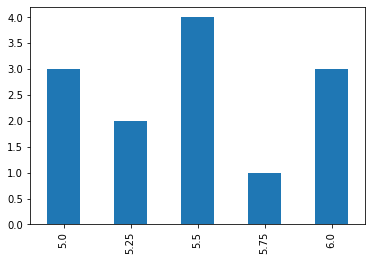

In [45]:
print('obtained credits: {}'.format(sum))
print('average grade: {:.3f}'.format(avg))
print('median grade: {}'.format(median))
print('lowest grade: {}'.format(min))
print('highest grade: {}'.format(max))

#create histogram of grades
grades.grade.sort_values().value_counts(sort=False).plot(kind='bar')